In [8]:
# import libraies
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft

In [9]:
# set up for xn and M
M=1000
n=np.arange(M)

xn=np.zeros(M)
x=np.zeros(M)
for i in n:
    xn[i]=(2*np.pi*n[i]/M)

h=2*np.pi/M

In [10]:
# first lets implement our functions. We create Vn and Pm.
def Vn(xn,K):
    return np.exp((-1j/h)*K*np.cos(xn))
def Pm(pm,K):
    return np.exp(pm**2*(-1j)/(2*h))
def GaussianWave(x,x0,p0):
    test=0
    for i in range(-4,4):
        test+= np.exp(-((x-x0+2*np.pi*i)**2)/(2*h))
    
    psi1=np.exp(1j* (p0*x)/(h))*test
    psi1=psi1/np.linalg.norm(psi1)
    return psi1


In [11]:
# for this I choose that initial parameters
GaussianWave=GaussianWave(xn,xn[20],xn[10])
V=Vn(xn,K=1.2)
P=Pm(xn,K=1.2)  


In [12]:
def Evolution(i): #Function that takes how many steps user wants and evolves function
    Steps=np.arange(i)
    OneStepEvolution = GaussianWave.copy()
    for _ in range(i):
        OneStepEvolution*=V
        OneStepEvolution=fft(OneStepEvolution)
        OneStepEvolution*=P
        OneStepEvolution=ifft(OneStepEvolution)
    return OneStepEvolution

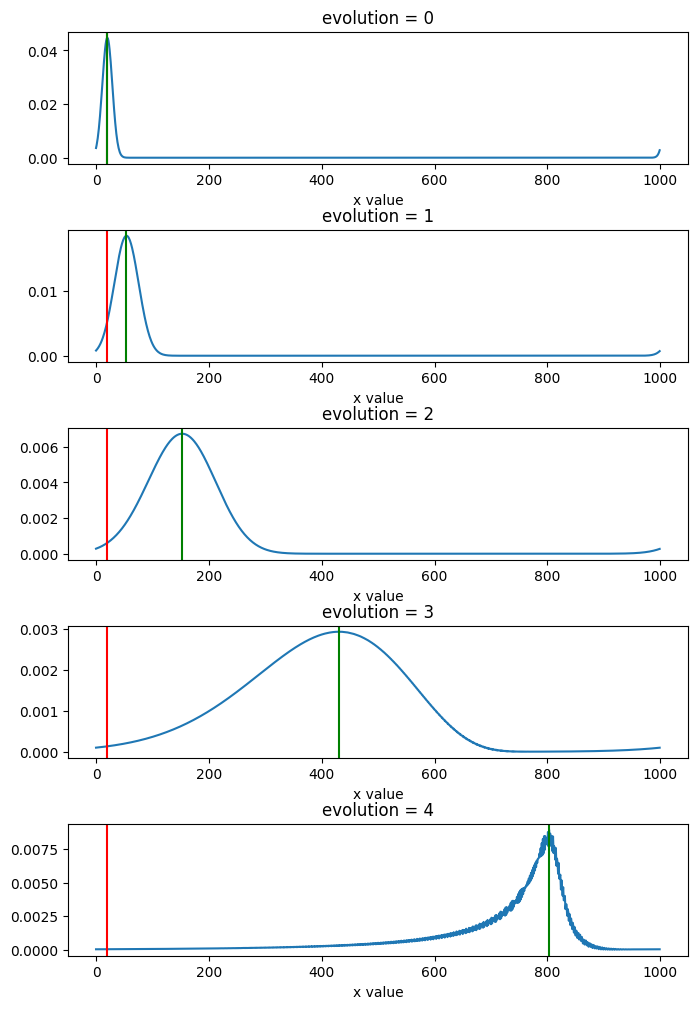

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

for ax, i in zip(axs, range(5)):
    # I calculate the evolution for steps given
    result = Evolution(i)
    highest_index = np.argmax(np.abs(result)**2)

    # we plot the power
    ax.plot(np.abs(result)**2)
    # here i plot vertical line. one for start and another how it evolved
    ax.axvline(x=20, color='r')
    ax.axvline(x=highest_index, color='g')
    ax.set_title(f"evolution = {i}")
    ax.set_xlabel("x value")

    psi_fft=fft(result)
    #for p value
    #ax.plot(np.abs(psi_fft)**2,color='b')

fig.subplots_adjust(hspace=0.5)
plt.show()

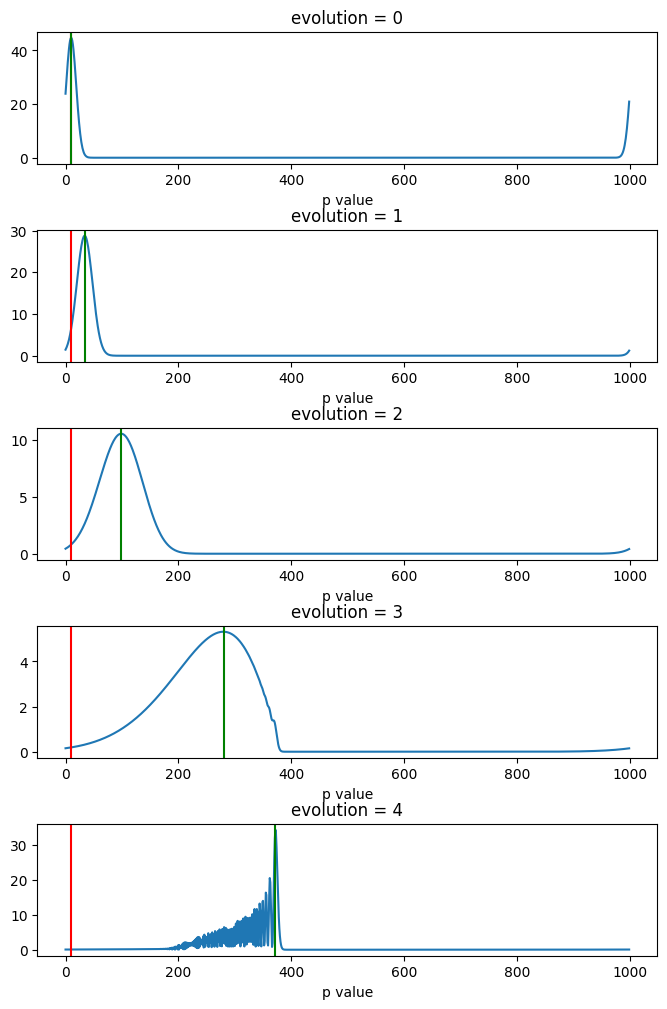

In [14]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
# same steps for p value.
for ax, i in zip(axs, range(5)):
    # I calculate the evolution for steps given
    result = Evolution(i)
    psi_fft=fft(result)
    highest_index = np.argmax(np.abs(psi_fft)**2)

    # we plot the power
    ax.plot(np.abs(psi_fft)**2)
    # here i plot vertical line. one for start and another how it evolved
    ax.axvline(x=10, color='r')
    ax.axvline(x=highest_index, color='g')
    ax.set_title(f"evolution = {i}")
    ax.set_xlabel("p value")

fig.subplots_adjust(hspace=0.5)
plt.show()